In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set();

In [2]:
df = pd.read_csv('penguins_lter.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
df.shape

(344, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [5]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [6]:
df.describe(include = ['O'])

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Sex,Comments
count,344,344,344,344,344,344,344,344,334,26
unique,3,3,1,3,1,190,2,50,3,7
top,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N61A2,Yes,11/27/07,MALE,Nest never observed with full clutch.
freq,120,152,344,168,344,3,308,18,168,13


In [7]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

We have the datframe with 17 columns and 344 rows.
It consist of text, categorical and numerical values

I will replace some of them with mean statistical values and some of them with filna function and I will drop some columns

In [8]:
to_drop = ['studyName', 'Region','Sample Number','Stage', 'Individual ID','Clutch Completion','Date Egg','Comments']

In [9]:
df.drop(to_drop, inplace = True, axis = 1)

In [10]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


I have a dataframe with the features what I am going to work with. 

### Filling NaN

In [11]:
df['Culmen Length'].fillna(method='bfill', inplace=True)

In [12]:
df['Culmen Depth'].fillna(method='bfill', inplace=True)

In [13]:
df['Flipper Length'].fillna(method='bfill', inplace=True)

In [14]:
df['Body Mass'].fillna(method='bfill', inplace=True)

In [15]:
# replace "na" and other expectable marks to NaN
df.replace(["n.a.","?","NA","n/a", "na", "--", '.'], np.nan, inplace = True)
df.head(20)

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799
7,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,34.1,18.1,193.0,3475.0,NaN,NaN,NaN
9,Adelie Penguin (Pygoscelis adeliae),Torgersen,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368


In [16]:
df['Gender'].fillna(method='bfill', inplace=True)

In [17]:
df['Delta 15 N (o/oo)'].fillna(int(df['Delta 15 N (o/oo)'].median()), inplace=True)

In [18]:
df['Delta 13 C (o/oo)'].fillna(int(df['Delta 13 C (o/oo)'].median()), inplace=True)

In [19]:
df.isna().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [35]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length,Body Mass,Gender,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE,8.00000,-25.00000
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.00000,-25.00000
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


### Remane columns 

In [36]:
df.rename(columns={"Culmen Length": "Culmen Length", "Culmen Depth": "Culmen Depth", 
                   'Flipper Length': 'Flipper Length', 'Body Mass': 'Body Mass',
                   'Gender':'Gender'
                  }, inplace = True)

In [37]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [60]:
mapping = {'Adelie Penguin (Pygoscelis adeliae)':'Adelie','Chinstrap penguin (Pygoscelis antarctica)':'Chinstrap',
           'Gentoo penguin (Pygoscelis papua)':'Gentoo'}
df['Species'] = df['Species'].map(mapping)

In [61]:
df['Species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [62]:
df.head()

,Species,Island,Culmen Length,Culmen Depth,Flipper Length,Body Mass,Gender,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,8.00000,-25.00000
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.00000,-25.00000
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


# Visialisation of Categorical features 

### Barchart 
### Geogrphical location 

I will visualize how body mass is different between Species. 
We have 3 deferent Species and 3 diferent Island of observation. Most of them from 'Biscoe', avarage amount from Dream and less of them from Torgersen. However they are from the same region. So it is not hard for them to move around the islands.

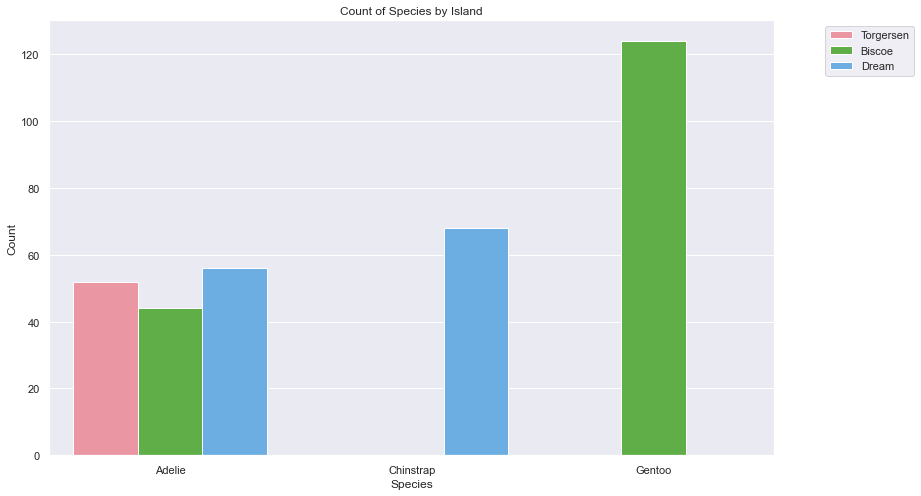

In [63]:
# create a stacked bar chart of counts by category and group
plt.figure(figsize =(13,8))

sns.countplot(x='Species', hue='Island', data=df)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1));
plt.title('Count of Species by Island')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

We canse that 3 types Species were founded on Torgerson Island, Chinstrap on Dream and Gento on Biscoe

Geigraphicaly we can say that 2 of Species mosly populate one island and do not migrate to another for some specific reason. And we have only one island that populated by 3 Species. 


### Body sahpe and mass differences 

<AxesSubplot:xlabel='Species', ylabel='Body Mass'>

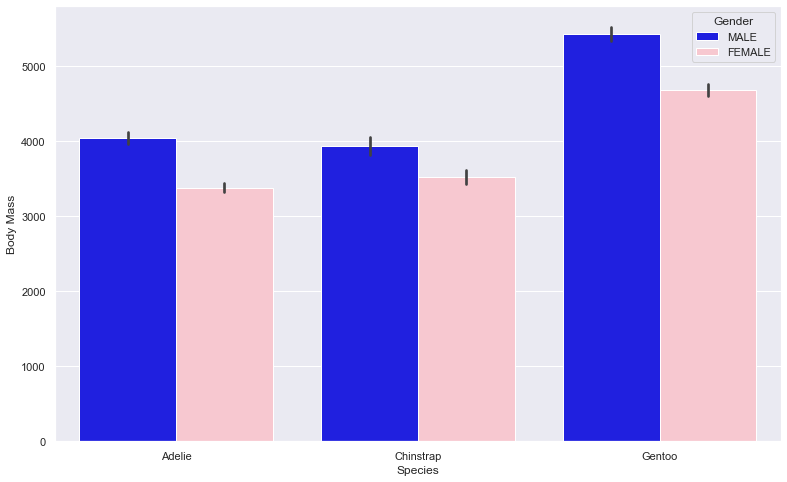

In [64]:
plt.figure(figsize =(13,8))

sns.set_palette(['blue','pink'])

sns.barplot(data=df, x="Species", y= "Body Mass", hue="Gender")

We have 3 Species with what we are working. I will see how diferent they are in they body mass,Culmen Length, Culmen Depth, Flipper Length

It is clear to see that we have difference between male and female in terms of body mass, and i belive there will not defrence between othere metrics related to the gender. 
Chinstrap and Adelie slightly very simmelar to each other. Gentoo is the biggest Species among all of them.


We can see that Adeile are identical to Chinstrap by the body mass and lenght of flippers. Let see waht is the diference in Culmen lenght and Depth.

# Scatterplot 

### Culmen Length and Culmen Depth 


Text(0.5, 1.0, 'Culmen Length VS Culmen Depth')

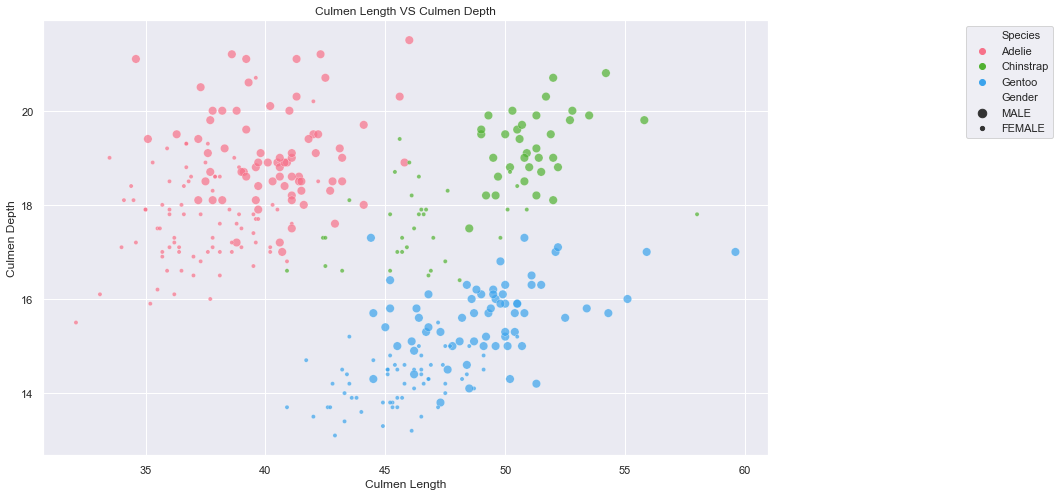

In [68]:
plt.figure(figsize=(13, 8))
sns.scatterplot(data=df, x='Culmen Length', y='Culmen Depth', alpha=0.7, hue='Species',  size='Gender')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1));
plt.title('Culmen Length VS Culmen Depth')

Culmen Length - main characteristic of Adelie

### Body Mass and Culmen Length 

Text(0.5, 1.0, 'Body Mass VS Culmen Length ')

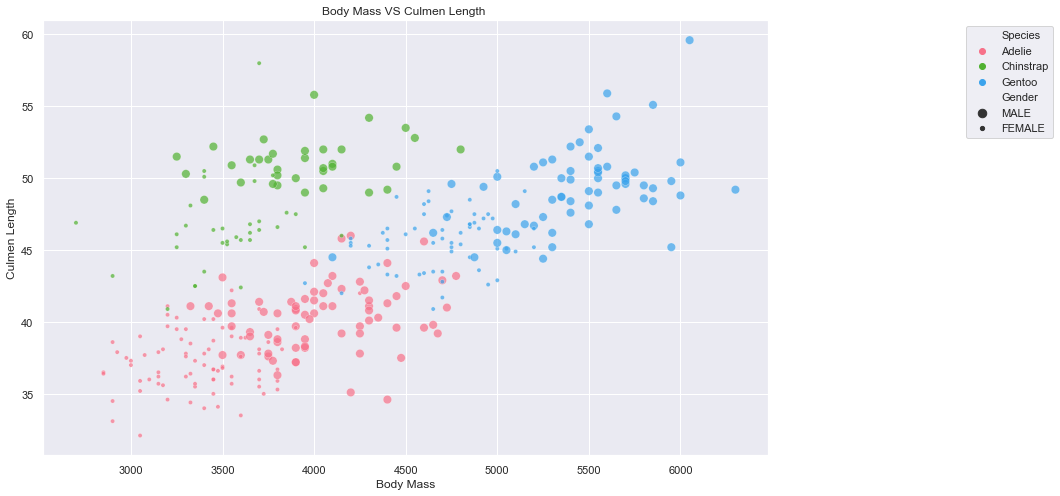

In [69]:
plt.figure(figsize=(13, 8))
sns.scatterplot(data=df, x='Body Mass', y='Culmen Length', alpha=0.7, hue='Species', size='Gender')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1));
plt.title('Body Mass VS Culmen Length ')



# Histograms

<Figure size 936x576 with 0 Axes>

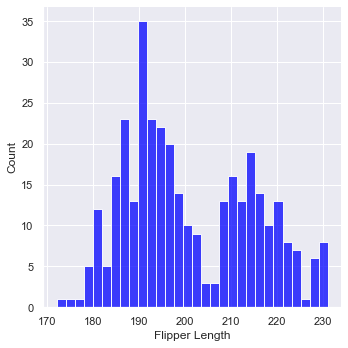

In [70]:
plt.figure(figsize=(13, 8))
sns.displot(df['Flipper Length'], bins = 30)


<AxesSubplot:xlabel='Flipper Length', ylabel='Count'>

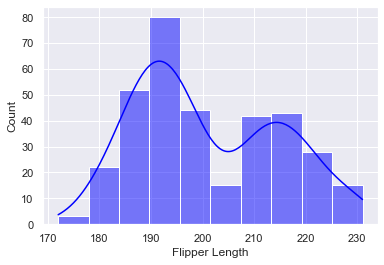

In [71]:
sns.histplot(data=df, x='Flipper Length', kde=True)

<AxesSubplot:xlabel='Flipper Length', ylabel='Count'>

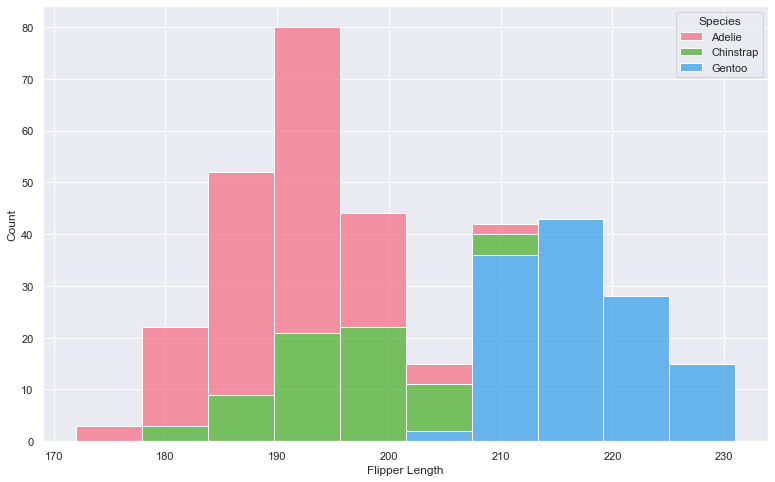

In [72]:
plt.figure(figsize=(13, 8))
sns.histplot(data=df, x='Flipper Length', hue="Species", multiple="stack")

### Boxplot 

<AxesSubplot:xlabel='Flipper Length', ylabel='Species'>

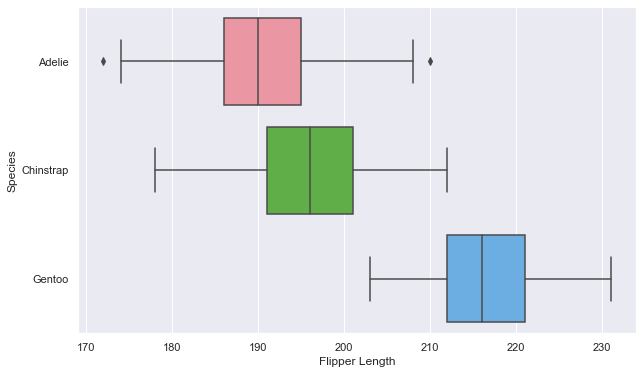

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Flipper Length', y="Species")

<AxesSubplot:xlabel='Flipper Length', ylabel='Species'>

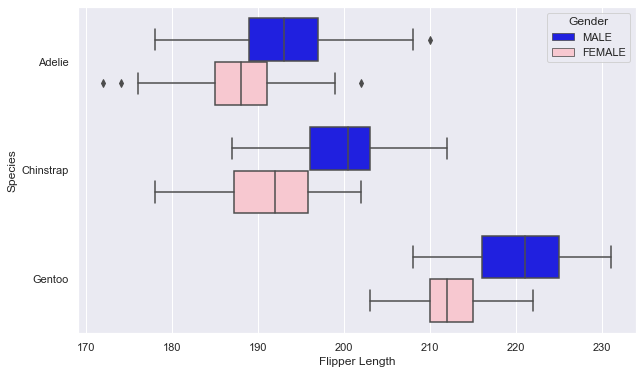

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Flipper Length', y="Species", hue="Gender")

### Violin

<AxesSubplot:xlabel='Flipper Length'>

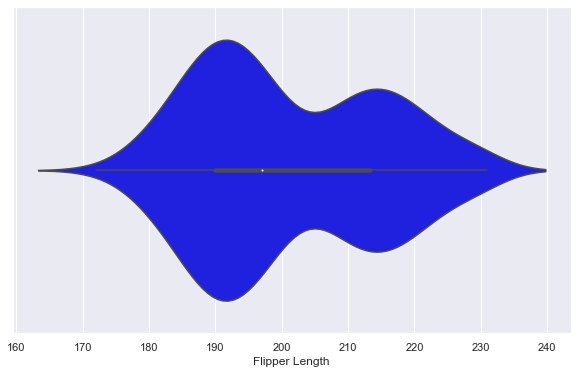

In [75]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["Flipper Length"])

<AxesSubplot:xlabel='Species', ylabel='Flipper Length'>

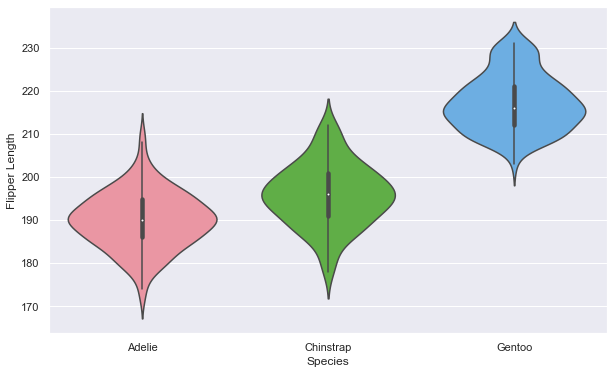

In [76]:
plt.figure(figsize=(10, 6))
sns.violinplot(data = df, x='Species', y= 'Flipper Length')

<AxesSubplot:xlabel='Species', ylabel='Culmen Length'>

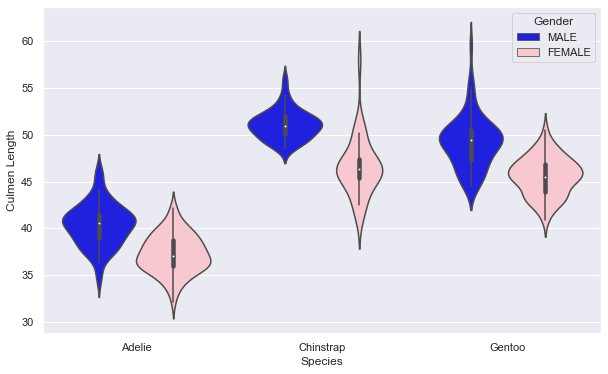

In [84]:
plt.figure(figsize=(10, 6))
sns.violinplot(data = df, x='Species', y= 'Flipper Length', hue = 'Gender')

<AxesSubplot:xlabel='Species', ylabel='Flipper Length'>

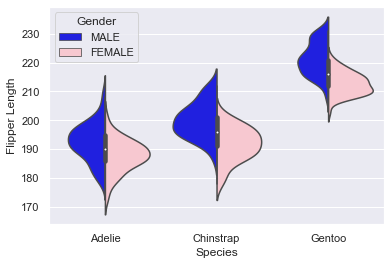

In [79]:
sns.violinplot(data = df, x='Species', y= 'Flipper Length', hue="Gender", split=True)

# DisPlot

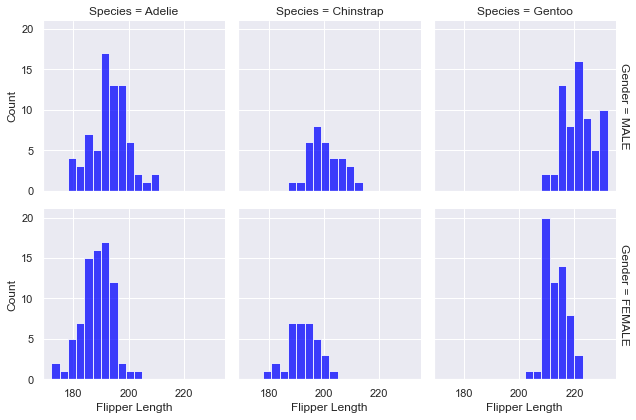

In [80]:
sns.displot(
    df, x="Flipper Length", col="Species", row="Gender",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

# Pairplot

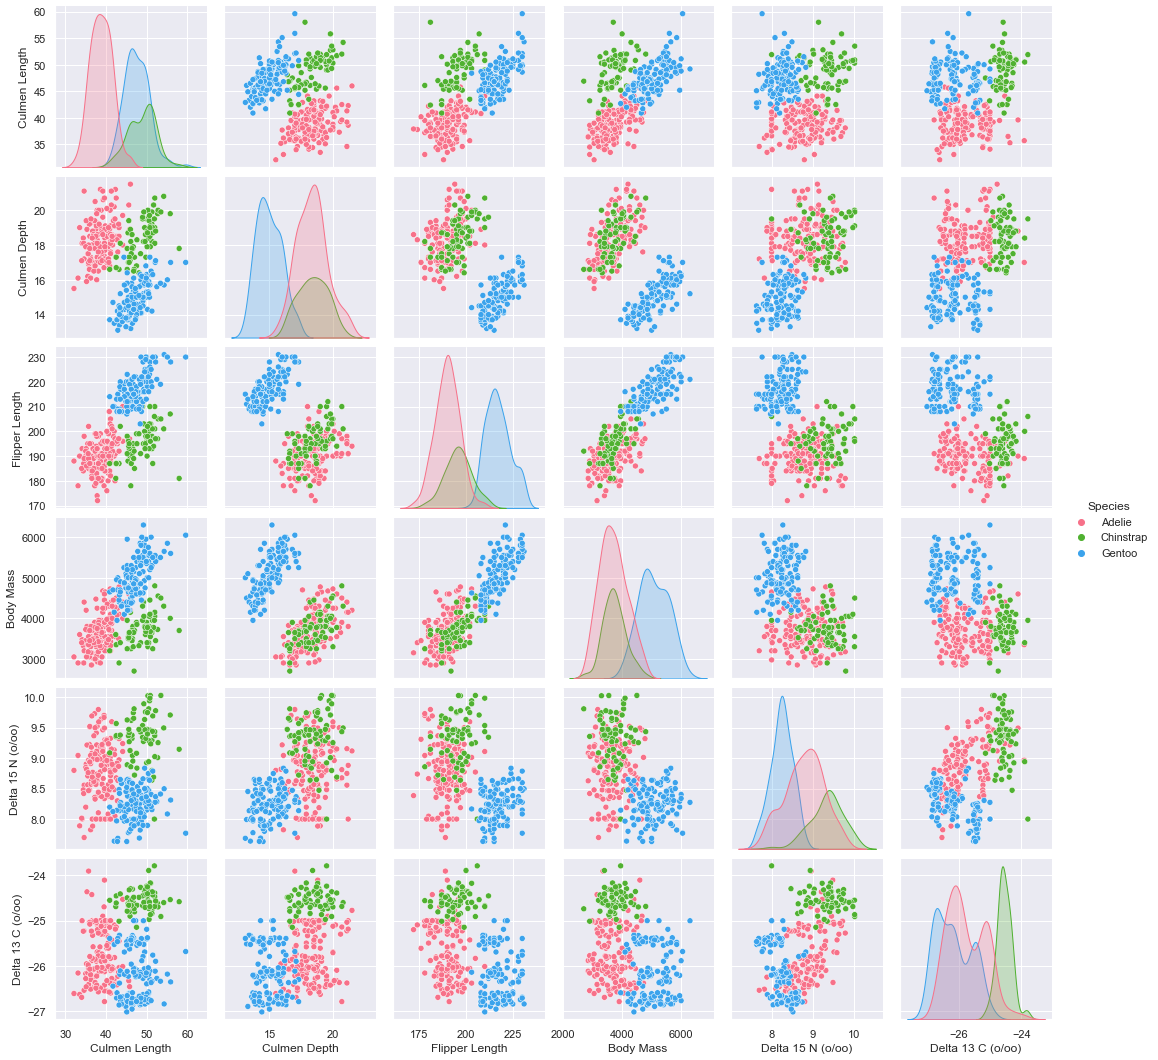

In [81]:
sns.pairplot(df, hue="Species")

Obsrvation: 

Geographical location.
The area that was aimed as place of research consist of 3 different islands. The Species in are spreaded on diferent islands. However on the islands populated by 3 Species and other islands only by one Species. 

Torgerson - Adelie, Chinstrap, Gentoo
Biscoe - Gento 
Dream - Chinstrap

Penguin observation:
Body Mass: Gentoo is the biggest type
           Adelie, Chinstrap are approximity  the same size
           
Genders: All Spesies have differences. Male > Femal in body mass, flipers lenght and so on.

Culmen length and depth: Those two feature shows as significant differences between the spesies 

Flipper Length: Adelie, Chinstrap have a small differnce as well, However it is more noticeable by the lenght of the flipers rather than body mass.

So I can conclude if we need to recognise a spesies by the mesurmnts it is important Culmen lenght and Fliper Lenght of the spesies and island of inhabitants. 


           

